In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

names =["0","1","2","3","4","5","6","7","8"]
data_df = pd.read_csv('concreteData.csv',names=names)

data_df 


,0,1,2,3,4,5,6,7,8
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [2]:
X = data_df.iloc[:, :-1]
y = data_df.iloc[:, -1]

In [3]:
import sklearn 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [4]:
# Create parameters from training sets

parametersX = []

for i in range(len(X_train.columns)):
    Cseries = X_train.iloc[:, i]
    mean = np.mean(Cseries)
    std = np.std(Cseries)
    parametersX.append([mean,std])
    
parametersY = [np.mean(y_train), np.std(y_train)]

In [5]:
# Normalize the training sets

X_train_norm = pd.DataFrame([[(X_train.iloc[i, j] - parametersX[j][0])/parametersX[j][1] 
                             for j in range(len(X_train.columns))] 
                            for i in range(len(X_train.iloc[:]))])

X_test_norm = pd.DataFrame([[(X_test.iloc[i, j] - parametersX[j][0])/parametersX[j][1] 
                             for j in range(len(X_test.columns))] 
                            for i in range(len(X_test.iloc[:]))])

# No need to normalize the test sets

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [6]:
print(X_train_norm.head(10))
print(y_train.head(10))
print(y_test.head(10))

          0         1         2         3         4         5         6  \
0 -0.024603 -0.836937 -0.849294  0.452814 -1.038637 -0.071980  1.010322   
1  0.760688 -0.614365  1.345841 -1.313913  0.844374 -0.408323  0.307869   
2 -0.064825  1.293898 -0.849294  0.199742 -1.038637  0.502390 -0.799453   
3  0.827725  1.353641 -0.849294  0.452814  0.170636 -1.934801 -0.254094   
4 -0.641344 -0.836937  0.713767 -1.056067  0.757997  0.391138  1.620818   
5 -0.854905 -0.836937  1.099861 -0.712271  0.671620  1.363945  0.281048   
6 -0.417249 -0.836937 -0.849294  0.596062 -1.038637 -0.071980  1.380707   
7  1.028836 -0.602651  0.614129 -1.170665  1.431735 -0.460068  0.869832   
8  2.111005 -0.836937 -0.849294  0.882558 -1.038637  1.959012 -2.093245   
9  0.071164  0.580496  0.614129  0.309565  0.516142 -0.899900 -1.033179   

          7  
0 -0.274315  
1 -0.687211  
2 -0.274315  
3 -0.274315  
4 -0.687211  
5  0.188128  
6 -0.274315  
7 -0.621148  
8 -0.720243  
9 -0.274315  
         8
612  25.9

In [7]:
#Calculate the loss function

def costFunc(X,y,theta):
    m = X.shape[0]
    costs = X.dot(theta) - y
    total_cost = costs.transpose().dot(costs) / (2 * m)
    return total_cost[0][0]


In [8]:
def return_Y_estimate(theta_now, data_x):
    theta_now = theta_now.reshape(-1, 1)
    _Y_estimate = np.dot(data_x, theta_now)

    return _Y_estimate

In [9]:
def return_dJ(theta_now, data_x, y_true):
    y_estimate = return_Y_estimate(theta_now, data_x)
    _N = data_x.shape[0]
    _num_of_features = data_x.shape[1]
    _dJ = np.zeros([_num_of_features, 1])
    
    for i in range(_num_of_features):
        _dJ[i, 0] = 2 * np.dot((y_estimate - y_true).T, data_x[:, i]) / _N
    
    return _dJ

def RMSE(theta_now, data_x, y_true):
    N = data_x.shape[0]
    temp = y_true - np.dot(data_x, theta_now)
    _J = np.sqrt(np.dot(temp.T, temp) / N)
    
    return _J

def gradient_descent(X, y, Learning_rate, ER, iterNum):
    _num_of_samples = X.shape[0]
    X_0 = np.ones([_num_of_samples, 1])
    new_x = np.column_stack((X_0, X))
    new_y = y.values.reshape(-1, 1)
    _num_of_features = new_x.shape[1]
    theta = np.zeros([_num_of_features, 1])
    flag = 0  
    ct = 0  
    J_history = list()
    
    while flag == 0 and ct < iterNum:
        last_theta = theta
        
        gradient =  return_dJ(theta, new_x, new_y)
        theta = theta - Learning_rate * gradient
        er = RMSE(last_theta, new_x, new_y) - RMSE(theta, new_x, new_y)
        J_history.append(costFunc(new_x, new_y, theta))
        if er < ER :
            flag = 1
        
        ct += 1
        
            
    return theta,J_history, ct

In [10]:
Learning_rate = 0.7*1e-3
ER = 0.1*1e-3
iterNum = 50000

In [11]:
theta, J_history, ct = gradient_descent(X_train_norm, y_train, Learning_rate, ER, iterNum)
print(theta)
print(J_history)
ct

[[34.91493304]
 [ 7.4150513 ]
 [ 3.71817194]
 [ 0.50200937]
 [-5.27655751]
 [ 3.65393478]
 [-1.73755685]
 [-2.8605445 ]
 [ 6.77081901]]
[766.0900970804231, 764.0793946243637, 762.0744481513025, 760.0752409607701, 758.0817564016152, 756.0939778718554, 754.1118888185268, 752.1354727375381, 750.1647131735198, 748.1995937196787, 746.2400980176491, 744.2862097573478, 742.3379126768269, 740.3951905621286, 738.4580272471397, 736.5264066134463, 734.6003125901908, 732.6797291539266, 730.7646403284755, 728.8550301847847, 726.9508828407838, 725.0521824612429, 723.1589132576313, 721.2710594879761, 719.388605456721, 717.5115355145865, 715.6398340584302, 713.7734855311071, 711.9124744213299, 710.056785263532, 708.2064026377282, 706.3613111693771, 704.5214955292442, 702.686940433265, 700.8576306424087, 699.0335509625419, 697.214686244293, 695.4010213829175, 693.5925413181633, 691.7892310341362, 689.9910755591658, 688.1980599656721, 686.4101693700336, 684.6273889324534, 682.849703856827, 681.077099390

3051

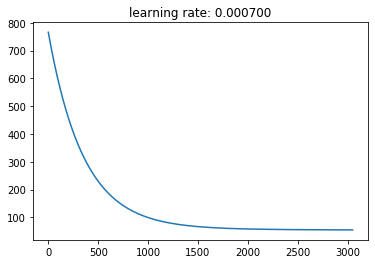

In [12]:
plt.figure()
plt.plot([i for i in range(len(J_history))], J_history)
plt.title("learning rate: %f" % Learning_rate)
plt.show()


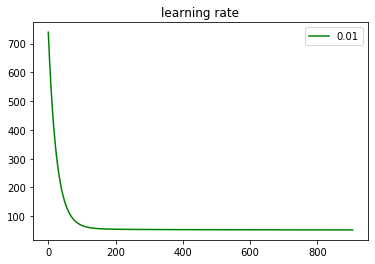

In [13]:
ta1, J_history1, ct1 = gradient_descent(X_train_norm, y_train, 0.01, 0.1*1e-3, 50000)
colors = ['b', 'g', 'r']
plt.figure()
plt.plot([i for i in range(len(J_history1))], J_history1, colors[1], label="0.01")
plt.title("learning rate")
plt.legend()
plt.show()


In [14]:
ta2, J_history2, ct2 = gradient_descent(X_train_norm, y_train, 0.05, 0.1*1e-3, 50000)
ct2

429

In [15]:
ta3, J_history3, ct3 = gradient_descent(X_train_norm, y_train, 0.1, 0.1*1e-3, 50000)
J_history3

[509.3277469614441,
 345.35160957663226,
 241.11943047930671,
 174.6801619142524,
 132.21982952334145,
 105.01209714476083,
 87.52782792030018,
 76.2548513797309,
 68.9573511158801,
 64.20928584368482,
 61.09950992409093,
 59.04490992291921,
 57.67171866575013,
 56.73998125624744,
 56.095398740398025,
 55.63857756018696,
 55.30536528546484,
 55.05425904082952,
 54.85833270601851,
 54.7000550377895,
 54.5679595664684,
 54.454502018813436,
 54.35468013381121,
 54.26514346220619,
 54.18361841040736,
 54.10853632394082,
 54.03879248777915,
 53.97358963836587,
 53.912336099272686,
 53.85457927079936,
 53.7999620365768,
 53.74819405121146,
 53.6990327104517,
 53.652270436583215,
 53.60772609483883,
 53.56523912179136,
 53.524665442182275,
 53.485874571887265,
 53.44874751328811,
 53.41317518493424,
 53.37905721570093,
 53.34630099128132,
 53.31482087853128,
 53.284537577883384,
 53.25537757027855,
 53.227272635767115,
 53.200159428018296,
 53.17397909368962,
 53.14867692876368,
 53.124202066

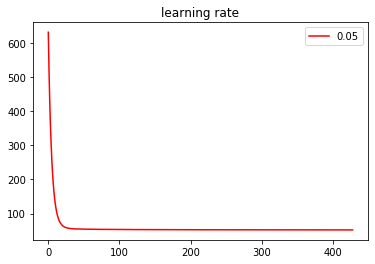

In [16]:
colors = ['b', 'g', 'r']
plt.figure()
plt.plot([i for i in range(len(J_history2))], J_history2, colors[2], label="0.05")
plt.title("learning rate")
plt.legend()
plt.show()

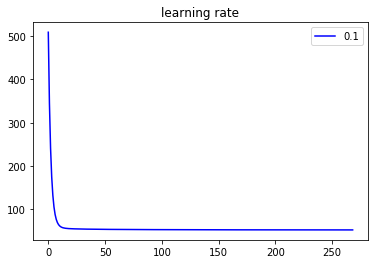

In [17]:
colors = ['b', 'g', 'r']
plt.figure()
plt.plot([i for i in range(len(J_history3))], J_history3, colors[0], label="0.1") 
plt.title("learning rate")
plt.legend()
plt.show()

In [18]:
def learningRatePlot(X_norm, y):
    colors = ['b', 'g', 'r', 'c','m']
    plt.figure()
    
    for i, al in enumerate([0.01, 0.05, 0.1]):
        
        ta, J, ci = gradient_descent(X_norm, y, al, 0.1*1e-3, 50000)
 
        plt.plot([i for i in range(len(J))], J, colors[i], label=str(al))
 
    plt.title("learning rate")
    plt.legend()
    plt.show()


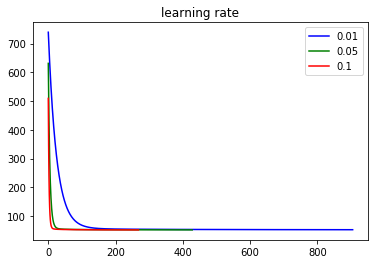

In [19]:
learningRatePlot(X_train_norm, y_train)

In [20]:
print(theta)

[[34.91493304]
 [ 7.4150513 ]
 [ 3.71817194]
 [ 0.50200937]
 [-5.27655751]
 [ 3.65393478]
 [-1.73755685]
 [-2.8605445 ]
 [ 6.77081901]]


In [21]:
#prediction
X_1=np.ones([len(X_test_norm), 1])
X_pre_norm = np.column_stack((X_1, X_test_norm))
y_pre = X_pre_norm.dot(theta)
print(y_pre)
print(y_pre.shape)
print(y_test)

[[32.53595824]
 [21.80259859]
 [24.33973386]
 [21.16650771]
 [33.84120044]
 [48.18749099]
 [25.23230146]
 [41.93830536]
 [35.30052495]
 [34.32245484]
 [45.57992635]
 [20.17972588]
 [31.74499152]
 [26.83626177]
 [15.65941044]
 [29.03140844]
 [56.047906  ]
 [44.01805709]
 [49.62154337]
 [33.76604184]
 [22.21073365]
 [37.14156216]
 [21.61935557]
 [49.85215561]
 [59.87547573]
 [34.04264893]
 [28.11310916]
 [30.55020485]
 [33.0409489 ]
 [23.2232525 ]
 [70.58383476]
 [48.22126367]
 [23.51484913]
 [35.36063445]
 [54.06402996]
 [32.99334984]
 [25.5161527 ]
 [23.60797191]
 [32.33737396]
 [25.31746461]
 [49.89728784]
 [22.50377939]
 [58.30643112]
 [35.85344772]
 [31.60109587]
 [33.71041055]
 [27.96056034]
 [28.9916846 ]
 [56.27237724]
 [36.93448602]
 [19.83518814]
 [29.37304282]
 [60.84880926]
 [56.3020369 ]
 [60.04324055]
 [17.03954359]
 [48.51934795]
 [25.03624469]
 [23.4795627 ]
 [31.70558103]
 [58.45276356]
 [71.88799459]
 [47.13561225]
 [36.75628599]
 [33.53042961]
 [43.7937844 ]
 [43.85129

In [22]:
def RMSE_Regression (y_pre, y_test):
    N = y_pre.shape[0]
    temp = y_test - y_pre
    RMSE_GD = np.sqrt(np.dot(temp.T, temp) / N)
    print(RMSE_GD)

In [23]:
#Return the RMSE through Gradient Descent 
RMSE_GD = RMSE_Regression(y_pre, y_test)

[[11.31588862]]


In [24]:
#Normal equation
def normalEquation(X, y):
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

In [25]:
theta_LSE = normalEquation(X_pre_norm, y_test)
 

In [26]:
x_pre = X_pre_norm
y_pre2 = x_pre.dot(theta_LSE)
print(y_pre2)


[[33.30721661]
 [23.06521012]
 [23.31159849]
 [26.29543195]
 [29.75187335]
 [47.57835017]
 [28.12522967]
 [36.46407399]
 [32.10354952]
 [39.44791102]
 [49.73049513]
 [21.9631553 ]
 [29.67591388]
 [27.03166344]
 [19.57603474]
 [27.54985393]
 [50.98074794]
 [44.39355754]
 [51.05557586]
 [34.4060317 ]
 [26.56217523]
 [38.30697034]
 [25.6908528 ]
 [47.22571246]
 [54.64201703]
 [32.49580753]
 [33.07970407]
 [26.7551533 ]
 [32.34454332]
 [25.6817787 ]
 [62.51658995]
 [48.31756347]
 [28.39316985]
 [37.75961948]
 [50.87238454]
 [32.42807738]
 [28.11024691]
 [27.28772349]
 [31.92124191]
 [30.58239704]
 [49.01611952]
 [27.16166754]
 [48.49936624]
 [31.47764438]
 [33.45794011]
 [31.8867087 ]
 [30.24841484]
 [29.70110356]
 [52.07537084]
 [39.42110372]
 [22.36060692]
 [31.91516417]
 [61.80380516]
 [56.89826866]
 [55.21520644]
 [19.86329989]
 [48.29232884]
 [28.97245014]
 [25.38441949]
 [34.05734917]
 [52.76166567]
 [63.19861505]
 [46.10237812]
 [40.78787969]
 [32.42394863]
 [37.23872193]
 [46.62017

In [27]:
#Return the RMSE through Least Squares Estimation  
RMSE_LSE = RMSE_Regression(y_pre2, y_test)

[[10.66713785]]
